In [12]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [13]:
df = pd.read_csv("supermarket_sales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  Rating         1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


#### Question 1: Example

In [14]:
### how many purchases (rows in the table, not 'Quantity') were done by Male and Female customers?

#### Question 1 - solution: Example

In [15]:
m_amount = len(df[df['Gender'] == 'Male'])
f_amount = len(df[df['Gender'] == 'Female'])

# do not print any intermediate results
# print *only your final* result in the form of a data frame (for clarity)

result = [('purchases by male', m_amount), ('purchases by female', f_amount)]
pd.DataFrame(result)

,0,1
0,purchases by male,498
1,purchases by female,502


#### Question 2

In [16]:
### what is the average Rating for products in the "Health and beauty" Product line?

In [17]:
# Filter for 'Health and beauty' and calculate mean
avg_rating = df[df['Product line'] == 'Health and beauty']['Rating'].mean()

# Print final result
result = [('Average Rating (Health and beauty)', avg_rating)]
pd.DataFrame(result, columns=['Metric', 'Value'])

,Metric,Value
0,Average Rating (Health and beauty),7.003289


#### Question 3

In [18]:
### how many products in each Product line were sold during the first week (days 1-7 including) of March 2019?
### use the 'Quantity' column for that purpose - the number of products purchased

In [19]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter for the first week of March (1st to 7th)
start_date = '2019-03-01'
end_date = '2019-03-07'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
march_week_df = df.loc[mask]

# Group by Product line and sum Quantity
grouped_data = march_week_df.groupby('Product line')['Quantity'].sum()

# Print final result
pd.DataFrame(grouped_data)

,Quantity
Product line,
Electronic accessories,100
Fashion accessories,56
Food and beverages,64
Health and beauty,94
Home and lifestyle,119
Sports and travel,80


#### Question 4

In [20]:
### plot a bar chart showing the number of products per category computed in the previous question

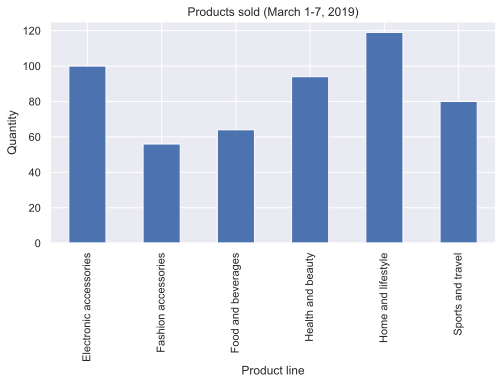

In [21]:
# Recalculate grouped_data (in case this cell runs independently)
start_date = '2019-03-01'
end_date = '2019-03-07'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
march_week_df = df.loc[mask]
grouped_data = march_week_df.groupby('Product line')['Quantity'].sum()

# Plot the bar chart based on Question 3 data
grouped_data.plot(kind='bar', title="Products sold (March 1-7, 2019)", ylabel="Quantity")
plt.show()

#### Question 5

In [22]:
### plot the same bar chart as above - split by gender (male, female)
### the split bar chart is called stacked bar: look up "plot stacked bar charts from a dataframe" to see how to plot it

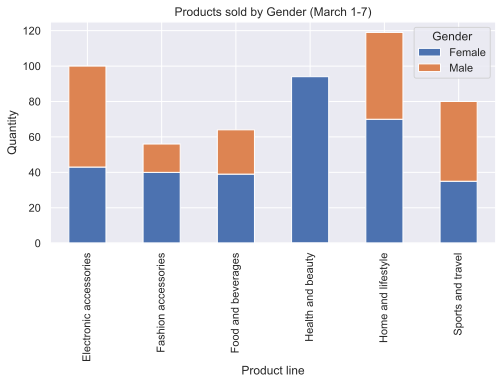

In [23]:
# Filter data again
start_date = '2019-03-01'
end_date = '2019-03-07'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
march_week_df = df.loc[mask]

# Group by Product line AND Gender
gender_grouped = march_week_df.groupby(['Product line', 'Gender'])['Quantity'].sum().unstack()

# Plot stacked bar chart
gender_grouped.plot(kind='bar', stacked=True, title="Products sold by Gender (March 1-7)")
plt.ylabel("Quantity")
plt.show()

#### Question 6

In [24]:
### what is the total sales ('Total') done by each Payment type during the whole period?
### use the full data in the dataset (not the first week of March) from now on

In [25]:
# Use the full dataset (df)
# Group by Payment and sum Total
payment_sales = df.groupby('Payment')['Total'].sum()

# Print final result
pd.DataFrame(payment_sales)

,Total
Payment,
Cash,112206.570
Credit card,100767.072
Ewallet,109993.107


#### Question 7

In [26]:
### plot a chart with total sales ('Total') of the "Sports and travel" products by calendar week (Monday-Sunday): 
### note the first and the last week can be incomplete (for instance, the data starts on Wednesday, and ends on Friday)
### assume all our sales data spans the same year (for instance, 2019)

### you can make use of the isocalendar() function: https://www.geeksforgeeks.org/isocalendar-function-of-datetime-date-class-in-python/

### x axis are weeks enumerated from the first to the last calendar week in the data
### y axis is the total sales that week

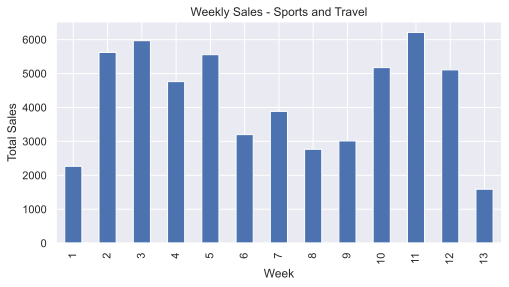

In [27]:
# Filter for "Sports and travel"
sports_df = df[df['Product line'] == 'Sports and travel'].copy()

# Get week number
sports_df['Week'] = sports_df['Date'].dt.isocalendar().week

# Group by Week and sum Total
weekly_sales = sports_df.groupby('Week')['Total'].sum()

# Plot
weekly_sales.plot(kind='bar', title="Weekly Sales - Sports and Travel", ylabel="Total Sales")
plt.show()

#### Question 8

In [28]:
### plot a line chart of total sales ('Total') per hour in our dataset
### the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total amout of sales during that hour
### (e.g., for 9 - all sales between 09:00 and 10:00)

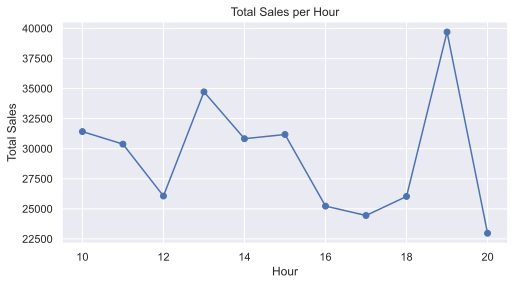

In [29]:
# Extract hour from Time string (e.g., "13:00" -> 13)
# We grab the first 2 characters and convert to integer
df['Hour'] = df['Time'].str[:2].astype(int)

# Group by Hour and sum Total sales
hourly_sales = df.groupby('Hour')['Total'].sum()

# Plot line chart
hourly_sales.plot(kind='line', marker='o', title="Total Sales per Hour", ylabel="Total Sales")
plt.show()

#### Question 9

In [30]:
### plot a line chart of the total number of purchases (rows) per hour in our dataset
### the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total number of purchases during that hour
### (e.g., for 9 - all sales between 09:00 and 10:00)

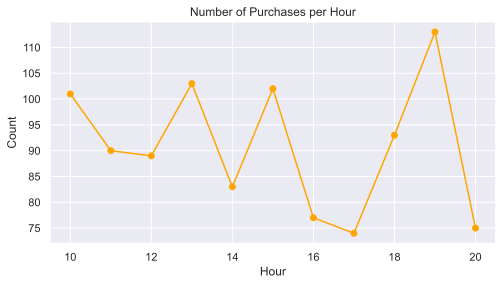

In [31]:
# Group by Hour and count rows (purchases)
hourly_count = df.groupby('Hour').size()

# Plot line chart
hourly_count.plot(kind='line', marker='o', color='orange', title="Number of Purchases per Hour", ylabel="Count")
plt.show()

#### Question 10

In [32]:
### what is the total income of strategic products by City?

### for each strategic product (as detailed in the product_types_strategy.csv file), 
###    display break down of total sales by cities - a table with three columns: 
###    (1) product line, (2) city and (3) total sales (the "Total" column) for that line in the city

In [33]:
# Load strategy file
strategy_df = pd.read_csv("product_types_strategy.csv")

# Find which products are strategic (where strategic == 'yes')
strategic_items = strategy_df[strategy_df['strategic'] == 'yes']['Product type'].tolist()

# Filter original df for only these products
strategic_sales = df[df['Product line'].isin(strategic_items)]

# Group by Product line and City, sum Total
city_breakdown = strategic_sales.groupby(['Product line', 'City'])['Total'].sum().reset_index()

# Print final result
pd.DataFrame(city_breakdown)

,Product line,City,Total
0,Electronic accessories,Mandalay,17051.4435
1,Electronic accessories,Naypyitaw,18968.9745
2,Electronic accessories,Yangon,18317.1135
3,Food and beverages,Mandalay,15214.8885
4,Food and beverages,Naypyitaw,23766.8550
5,Food and beverages,Yangon,17163.1005
6,Health and beauty,Mandalay,19980.6600
7,Health and beauty,Naypyitaw,16615.3260
8,Health and beauty,Yangon,12597.7530
9,Sports and travel,Mandalay,19988.1990
